# Chapter 2 Code

We'll use Python's NumPy library in what follows, as well as Matplotlib for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bisection

Here's an implementation of the bisection algorithm.  We will test it on this function:

In [2]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

The implementation:

In [3]:
M = 1000
ϵ = 1e-8
α, β = 0, 1

    
i = 1
a, b = α, β
while i <= M:
    c = (a + b) / 2
    if abs(f(c)) < ϵ:
        print(c)
        break
    i += 1
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
        
if i > M:
    print("Failed to converge.")

0.408293504267931


## User Defined Functions

Here's the basic implementation of the function $\tau$.

In [4]:
def tau(z, S, phi):
    """
    Evaluates the function tau(z) given data S, phi, where
    S and phi are assumed to be arrays.
    """
    a = 0
    for i, x in enumerate(S):
        b = a + phi[i]
        if a < z <= b:
            return x
        a = b

Here's a more efficient implementation.

In [5]:
def tau(z, S, phi):
    i = np.searchsorted(np.cumsum(phi), z)
    return S[i]

And here's a closure that generates the function $\tau$.

In [6]:
def tau_factory(S, phi):
    Φ = np.cumsum(phi)
    
    def tau(z):
        i = np.searchsorted(Φ, z)
        return S[i]
    
    return tau

We generate a function $\tau$ that acts on $z$ alone by calling the function factory:

In [7]:
phi = 0.2, 0.5, 0.3
S = 0, 1, 2
tau = tau_factory(S, phi)

In [8]:
tau(0.1)  # Should be 0

0

All of these functions work as expected.  To illustrate, here $\tau$ is used to generate draws from a given distribution $\phi$.

In [9]:
size = 100_000

draws = np.empty(size)
for j in range(size):
    W = np.random.uniform()
    draws[j] = tau(W)
    
# Compute fraction of draws with each possible value
frequency = [np.mean(draws==j) for j in S]
    

Let's check that the empirical frequency approximately coincides with the probabilities in $\phi$.

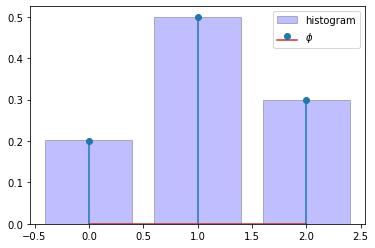

In [10]:
fig, ax = plt.subplots()

ax.bar(S, frequency, 
       edgecolor='k',
       facecolor='b',
       alpha=0.25, 
       label="histogram")

ax.stem(S, phi, label='$\\phi$')

ax.legend()

plt.show()

## Object Oriented Programming

Here's a class that implements the function $\tau$ as a method, as well as a method to generate draws from $\phi$.

In [11]:
class Tau:
    
    def __init__(self, S, phi):
        self.S = S
        self.Φ = np.cumsum(phi)
    
    def tau(self, z):
        i = np.searchsorted(self.Φ, z)
        return self.S[i]
    
    def draw(self):
        W = np.random.uniform()
        return self.tau(W)

In [12]:
tau = Tau(S, phi)

In [13]:
for i in range(5):
    print(tau.draw())

0
1
2
1
1
